In [1]:
import numpy as np

In [2]:
data = np.genfromtxt('Datasets/spamnewf.csv',dtype = str,delimiter = ',')
data

array([['Message', 'Spam/Ham'],
       ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight k? I've cried enough today",
        'ham'],
       ['Where r u going', 'ham'],
       ['Won a lottery', 'spam']], dtype='<U107')

In [3]:
import pandas as pd
df = pd.read_table('Datasets/spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
df.shape

(5572, 4)

In [5]:
x = df.iloc[:,1].values
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [6]:
y = df.iloc[:,0].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [7]:
np.unique(y)

array(['ham', 'spam'], dtype=object)

In [8]:
unique_labels, counts = np.unique(y, return_counts=True)
print(unique_labels)
print(counts)
len(y)

['ham' 'spam']
[4825  747]


5572

#

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
punct      5572 non-null int64
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [11]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [12]:
df_string = df.copy()
df_string = df_string.drop(columns='length')
df_string = df_string.drop(columns='punct')
df_string

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df_string['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [14]:
df_string.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
df.groupby('label').describe()

length                                                           \
        count        mean        std   min    25%    50%    75%    max   
label                                                                    
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0   
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0   

        punct                                                 
        count      mean       std  min  25%  50%  75%    max  
label                                                         
ham    4825.0  3.939896  4.734768  0.0  1.0  3.0  5.0  133.0  
spam    747.0  5.712182  3.460834  0.0  3.0  5.0  8.0   26.0

In [16]:
df_string.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
df_string['length'] = df_string['message'].apply(len)
df_string.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
s = df_string['message'][0]
print(s)
print(s.split())
print(len(s.split()))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']
20


In [19]:
df_string['word_count'] = df_string['message'].apply(lambda x : len(x.split()))

In [20]:
df_string['word_count']

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: word_count, Length: 5572, dtype: int64

In [21]:
df_string['char_count'] = df_string['message'].apply(lambda x : len(x.replace(" ","")))
df_string['char_count']

0        92
1        24
2       128
3        39
4        49
       ... 
5567    131
5568     29
5569     48
5570    100
5571     21
Name: char_count, Length: 5572, dtype: int64

In [22]:
df_string['word_density'] = df_string['word_count'] / (df_string['char_count'])
df_string['word_density']

0       0.217391
1       0.250000
2       0.218750
3       0.282051
4       0.265306
          ...   
5567    0.229008
5568    0.275862
5569    0.208333
5570    0.260000
5571    0.285714
Name: word_density, Length: 5572, dtype: float64

In [23]:

df_string[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,20,92,0.217391
1,6,24,0.250000
2,28,128,0.218750
3,11,39,0.282051
4,13,49,0.265306
5,32,116,0.275862
6,16,62,0.258065
7,26,135,0.192593
8,26,132,0.196970
9,29,126,0.230159


In [24]:
df_string

,label,message,length,word_count,char_count,word_density
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,92,0.217391
1,ham,Ok lar... Joking wif u oni...,29,6,24,0.250000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,128,0.218750
3,ham,U dun say so early hor... U c already then say...,49,11,39,0.282051
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,49,0.265306
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,30,131,0.229008
5568,ham,Will ü b going to esplanade fr home?,36,8,29,0.275862
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,48,0.208333
5570,ham,The guy did some bitching but I acted like i'd...,125,26,100,0.260000


In [25]:
df_string.groupby('label',sort = False).count()

,message,length,word_count,char_count,word_density
label,,,,,
ham,4825,4825,4825,4825,4825
spam,747,747,747,747,747


In [26]:
mel_count=df_string['message'].str.contains('esplanade').sum()
if mel_count>0:
    print ("There are {m} values".format(m=mel_count))

There are 3 values


In [27]:
gk = df_string.groupby('label')
gk.first()

,message,length,word_count,char_count,word_density
label,,,,,
ham,"Go until jurong point, crazy.. Available only ...",111,20,92,0.217391
spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,128,0.218750


In [28]:
gk.get_group('spam').head()

,message,length,word_count,char_count,word_density
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,128,0.218750
5,FreeMsg Hey there darling it's been 3 week's n...,147,32,116,0.275862
8,WINNER!! As a valued network customer you have...,157,26,132,0.196970
9,Had your mobile 11 months or more? U R entitle...,154,29,126,0.230159
11,"SIX chances to win CASH! From 100 to 20,000 po...",136,26,111,0.234234


In [29]:
wc = df_string.groupby('word_count').count()
wc

,label,message,length,char_count,word_density
word_count,,,,,
1,40,40,40,40,40
2,39,39,39,39,39
3,79,79,79,79,79
4,196,196,196,196,196
5,356,356,356,356,356
...,...,...,...,...,...
103,1,1,1,1,1
109,1,1,1,1,1
125,2,2,2,2,2


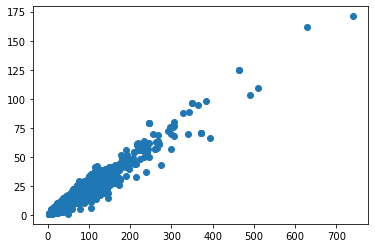

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df_string['char_count'],df_string['word_count'])

# Length of Spam Vs Ham

In [31]:
spdf = gk.get_group('spam')
spdf

,message,length,word_count,char_count,word_density
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,128,0.218750
5,FreeMsg Hey there darling it's been 3 week's n...,147,32,116,0.275862
8,WINNER!! As a valued network customer you have...,157,26,132,0.196970
9,Had your mobile 11 months or more? U R entitle...,154,29,126,0.230159
11,"SIX chances to win CASH! From 100 to 20,000 po...",136,26,111,0.234234
...,...,...,...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,90,16,75,0.213333
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,33,126,0.261905
5547,Had your contract mobile 11 Mnths? Latest Moto...,160,28,133,0.210526
5566,REMINDER FROM O2: To get 2.50 pounds free call...,147,28,120,0.233333


In [32]:
spam_length = spdf['length'].values
np.max(spam_length)

223

In [33]:
hdf = gk.get_group('ham')
hdf

,message,length,word_count,char_count,word_density
0,"Go until jurong point, crazy.. Available only ...",111,20,92,0.217391
1,Ok lar... Joking wif u oni...,29,6,24,0.250000
3,U dun say so early hor... U c already then say...,49,11,39,0.282051
4,"Nah I don't think he goes to usf, he lives aro...",61,13,49,0.265306
6,Even my brother is not like to speak with me. ...,77,16,62,0.258065
...,...,...,...,...,...
5565,Huh y lei...,12,3,10,0.300000
5568,Will ü b going to esplanade fr home?,36,8,29,0.275862
5569,"Pity, * was in mood for that. So...any other s...",57,10,48,0.208333
5570,The guy did some bitching but I acted like i'd...,125,26,100,0.260000


In [34]:
ham_length = hdf['length'].values
ham_length.max()

910

num_bins =1.15** np.arange(0,50)
plt.hist(spam_length, num_bins, facecolor='blue', alpha=0.5)
plt.hist(ham_length, num_bins, facecolor='orange', alpha=0.5)
plt.show()


# WordCloud

In [35]:
# Taking messages from Ham
ham_msgs = hdf['message'].values
#ham_msgs = hdf['message'].values[0] for single string
ham_msgs

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       'U dun say so early hor... U c already then say...', ...,
       'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [37]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
!pip install wordcloud

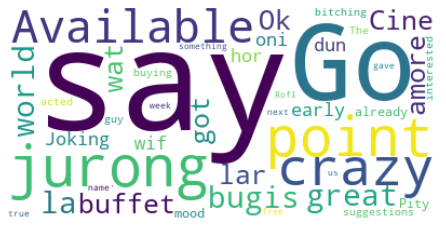

In [38]:
stopwords = set(STOPWORDS)

# create wordcloud object
wc = WordCloud(background_color="white",
        max_words=4000, 
                stopwords=stopwords)
# generate wordcloud
wc.generate(str(ham_msgs))
plt.imshow(wc, interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [39]:
# Taking messages from Spam
spam_msgs = spdf['message'].values
#spam_msgs = spdf['message'].values[0] for single string
spam_msgs

array(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
       'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
       'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
       'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
       'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
       'XXXMobileMovieClub: To

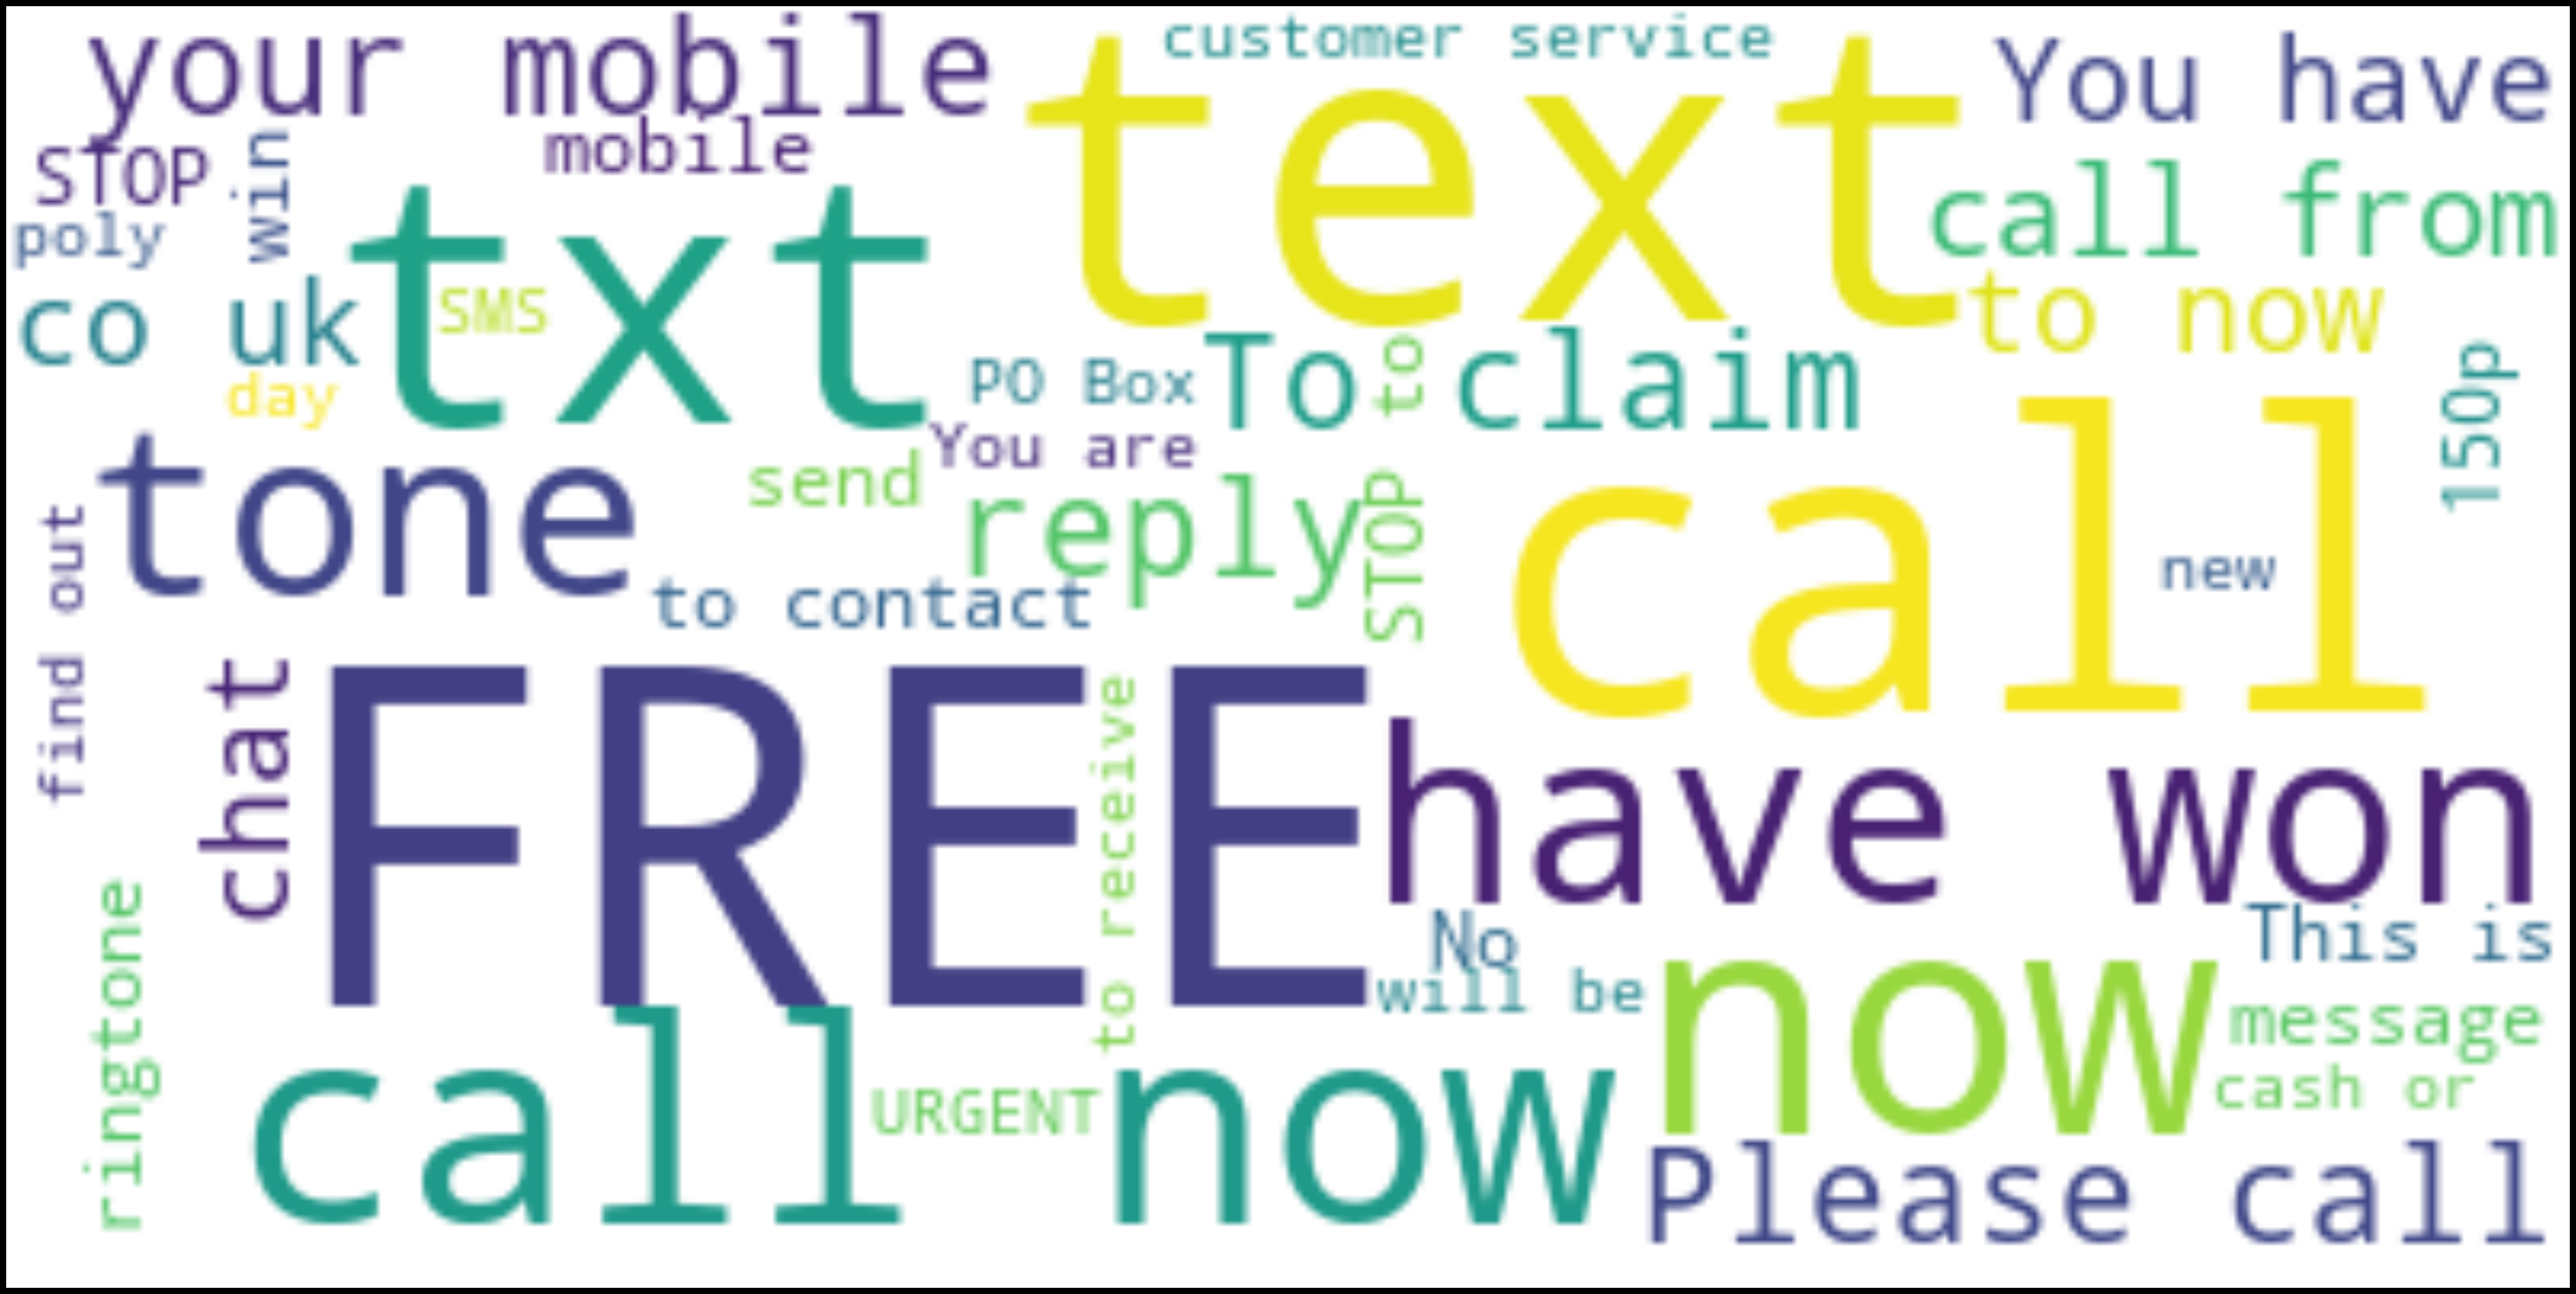

In [40]:
stopwords = set(STOPWORDS)

# create wordcloud object
wc = WordCloud(background_color="white",
        max_words=40, 
                stopwords=stopwords)
# generate wordcloud
wc.generate(str(spam_msgs))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wc, interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Sklearn

In [41]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [42]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,0].values

In [43]:
x

array([[111,   9],
       [ 29,   6],
       [155,   6],
       ...,
       [ 57,   7],
       [125,   1],
       [ 26,   1]], dtype=int64)

In [44]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state =0)

In [47]:
x_train.shape

(3900, 2)

In [48]:
x_test.shape

(1672, 2)

In [49]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()

model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)
y_pred[0:100]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [50]:
y_test[0:100]

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
accuracy_score(y_test,y_pred)*100

87.97846889952153

In [53]:
confusion_matrix(y_test,y_pred)

array([[1366,   85],
       [ 116,  105]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1451
        spam       0.55      0.48      0.51       221

    accuracy                           0.88      1672
   macro avg       0.74      0.71      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [55]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()

model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
y_pred[0:100]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype='<U4')

In [56]:
confusion_matrix(y_test,y_pred)

array([[1445,    6],
       [ 219,    2]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1451
        spam       0.25      0.01      0.02       221

    accuracy                           0.87      1672
   macro avg       0.56      0.50      0.47      1672
weighted avg       0.79      0.87      0.81      1672



# Feature Extraction

In [ ]:
#Most ML algorithms cant take in raw text

In [ ]:
# Instead we need to perform a feature extraction from the raw text in order to pass numerical features to the ML Algorithm

In [ ]:
# For example, we could count the occurence of each word to map text to a number

# Count Vectorizer

In [137]:
new_message = ["Hey, lets go to the park today ",
              "Call your father",
              "Want to go and water your plants"]

In [138]:
new_message

['Hey, lets go to the park today ',
 'Call your father',
 'Want to go and water your plants']

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2, 2))
vect
# It returns a Document Term matrix

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# analyser = Whether the feature should be made of word n-gram or character n-grams
# Here even the punctuations will be considered
# Binary If True, all non zero counts are set to 1. 
# This is useful for discrete probabilistic models that model binary events rather than integer counts.

# decode_error='strict' 
# Instruction on what to do if a byte sequence is given to analyze that contains characters not of the
# given encoding. By default, it is ‘strict’, meaning that a UnicodeDecodeError will be raised. 
# Other values are ‘ignore’ and ‘replace’.
# https://wiki.python.org/moin/UnicodeDecodeError
# Invalid string literal '^.*\s(\d+)\s.*$'

#input = content expected to be a sequence of items that can be of type string

# max_df = document frequency
#....

#.....

#ngram_range=(1, 1) Uni Grams
# (1,2) - Uni and Bigrams
# (2,2) - Bigrams

# preprocessor - just preserves the tokenization

#token_pattern='(?u)\\b\\w\\w+\\b' - It considers tokens
#punctuation is completely ignored and always treated as a token separator

In [62]:
dtm_array = vect.fit_transform(new_message)
dtm_array

<3x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [63]:
dtm_array= dtm_array.toarray()
dtm_array

array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]], dtype=int64)

In [64]:
dtm_column = vect.get_feature_names()
dtm_column

['and water',
 'call your',
 'go and',
 'go to',
 'hey lets',
 'lets go',
 'park today',
 'the park',
 'to go',
 'to the',
 'want to',
 'water your',
 'your father',
 'your plants']

In [65]:
dtm_df = pd.DataFrame(dtm_array,columns = dtm_column)
dtm_df

,and water,call your,go and,go to,hey lets,lets go,park today,the park,to go,to the,want to,water your,your father,your plants
0,0,0,0,1,1,1,1,1,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0,1,1,0,1


# TFIDF Transformer and Vectorizer

In [139]:
new_message

['Hey, lets go to the park today ',
 'Call your father',
 'Want to go and water your plants']

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()
tvect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [141]:
dtm_array = tvect.fit_transform(new_message)
dtm_array

<3x14 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [142]:
dtm_array= dtm_array.toarray()
dtm_array

array([[0.        , 0.        , 0.        , 0.30650422, 0.40301621,
        0.40301621, 0.40301621, 0.        , 0.40301621, 0.30650422,
        0.40301621, 0.        , 0.        , 0.        ],
       [0.        , 0.62276601, 0.62276601, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4736296 ],
       [0.41756662, 0.        , 0.        , 0.31757018, 0.        ,
        0.        , 0.        , 0.41756662, 0.        , 0.31757018,
        0.        , 0.41756662, 0.41756662, 0.31757018]])

In [143]:
dtm_column = tvect.get_feature_names()
dtm_column

['and',
 'call',
 'father',
 'go',
 'hey',
 'lets',
 'park',
 'plants',
 'the',
 'to',
 'today',
 'want',
 'water',
 'your']

In [144]:
dtm_df = pd.DataFrame(dtm_array,columns = dtm_column)
dtm_df

,and,call,father,go,hey,lets,park,plants,the,to,today,want,water,your
0,0.000000,0.000000,0.000000,0.306504,0.403016,0.403016,0.403016,0.000000,0.403016,0.306504,0.403016,0.000000,0.000000,0.00000
1,0.000000,0.622766,0.622766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.47363
2,0.417567,0.000000,0.000000,0.317570,0.000000,0.000000,0.000000,0.417567,0.000000,0.317570,0.000000,0.417567,0.417567,0.31757


In [145]:
def termFrequency(term, doc):  
      
    """ 
    Input: term: Term in the Document, doc: Document 
    Return: Normalized tf: Number of times term occurs 
      in document/Total number of terms in the document 
    """
    # Splitting the document into individual terms 
    normalizeTermFreq = doc.lower().split()  
  
    # Number of times the term occurs in the document 
    term_in_document = normalizeTermFreq.count(term.lower())  
  
    # Total number of terms in the document 
    len_of_document = float(len(normalizeTermFreq ))  
  
    # Normalized Term Frequency 
    normalized_tf = term_in_document / len_of_document  
  
    return normalized_tf 

In [146]:
doc = new_message[0]
print(doc)
term = 'today'

Hey, lets go to the park today 


In [147]:
normalizeTermFreq = doc.lower().split()
normalizeTermFreq

['hey,', 'lets', 'go', 'to', 'the', 'park', 'today']

In [148]:
term_in_document = normalizeTermFreq.count(term.lower())
term_in_document

1

In [149]:
len_of_document = float(len(normalizeTermFreq ))
len_of_document

7.0

In [150]:
normalized_tf = term_in_document / len_of_document 
normalized_tf

0.14285714285714285

In [151]:
termFrequency('today',new_message[0])

0.14285714285714285

In [159]:
import math
def inverseDocumentFrequency(term, allDocs): 
    num_docs_with_given_term = 0
  
    """ 
    Input: term: Term in the Document, 
           allDocs: List of all documents 
    Return: Inverse Document Frequency (idf) for term 
            = Logarithm ((Total Number of Documents) /  
            (Number of documents containing the term)) 
    """
    # Iterate through all the documents 
    for i in range(0,len(new_message)): 
          
        """ 
        Putting a check if a term appears in a document. 
        If term is present in the document, then  
        increment "num_docs_with_given_term" variable 
        """
        if term.lower() in allDocs[i].lower().split(): 
            num_docs_with_given_term += 1
            print(num_docs_with_given_term)
  
    if num_docs_with_given_term > 0: 
        # Total number of documents 
        total_num_docs = len(allDocs)  
  
        # Calculating the IDF  
        idf_val = math.log(float(total_num_docs) / num_docs_with_given_term) 
        return idf_val 
    else: 
        return 0

In [107]:
term = 'go'

In [77]:
term.lower() in new_message[0].lower().split()

True

In [160]:
inverseDocumentFrequency('today', new_message)

1


1.0986122886681098

In [164]:
0.14285714285714285*0.47712125471966244

0.06816017924566606

In [157]:
len(new_message)

3

In [163]:
math.log(3,10)

0.47712125471966244

# TF-IDF Transformer

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer
ttrans = TfidfTransformer()
ttrans

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [111]:
tfidf_out = ttrans.fit_transform(dtm_array)
tfidf_out

<3x14 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [112]:
tfidf_out_array = tfidf_out.toarray()
tfidf_out_array

array([[0.        , 0.        , 0.        , 0.24292439, 0.41999416,
        0.41999416, 0.41999416, 0.        , 0.41999416, 0.24292439,
        0.41999416, 0.        , 0.        , 0.        ],
       [0.        , 0.65448363, 0.65448363, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.37855298],
       [0.447051  , 0.        , 0.        , 0.25857405, 0.        ,
        0.        , 0.        , 0.447051  , 0.        , 0.25857405,
        0.        , 0.447051  , 0.447051  , 0.25857405]])

In [113]:
tfidf_df = pd.DataFrame(tfidf_out_array,columns = dtm_column)
tfidf_df

,and,call,father,go,hey,lets,park,plants,the,to,today,want,water,your
0,0.000000,0.000000,0.000000,0.242924,0.419994,0.419994,0.419994,0.000000,0.419994,0.242924,0.419994,0.000000,0.000000,0.000000
1,0.000000,0.654484,0.654484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378553
2,0.447051,0.000000,0.000000,0.258574,0.000000,0.000000,0.000000,0.447051,0.000000,0.258574,0.000000,0.447051,0.447051,0.258574
